# Regresion Lineal
---

In [34]:
#Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from Functions import uninum, unicat, binum, bicat, multiV
import openpyxl
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### 1. Obtencion de Datos, Comprension del Dataset y ETL

In [8]:
df =pd.read_csv('/workspaces/P16-Linear-Regression-Model/data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [ ]:
#Verificamos Duplicados
df.duplicated().sum()

np.int64(1)

In [ ]:
#Eliminamos Duplicados
df.drop_duplicates().reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.rename(columns={'bmi':'IMC'}, inplace=True)
df.head()

,age,sex,IMC,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Separamos Variables Numericas y Categoricas
numdf = df.select_dtypes(include='number')
catdf = df.select_dtypes(include='str')

#Aplicamos Factorizacion a las variables categoricas
catdf_encoded = catdf.apply(lambda x: pd.factorize(x)[0])

total_df = pd.concat([numdf, catdf_encoded], axis=1)
total_df.head()

,age,IMC,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


#### 1. Analisis Univariante - Numerico

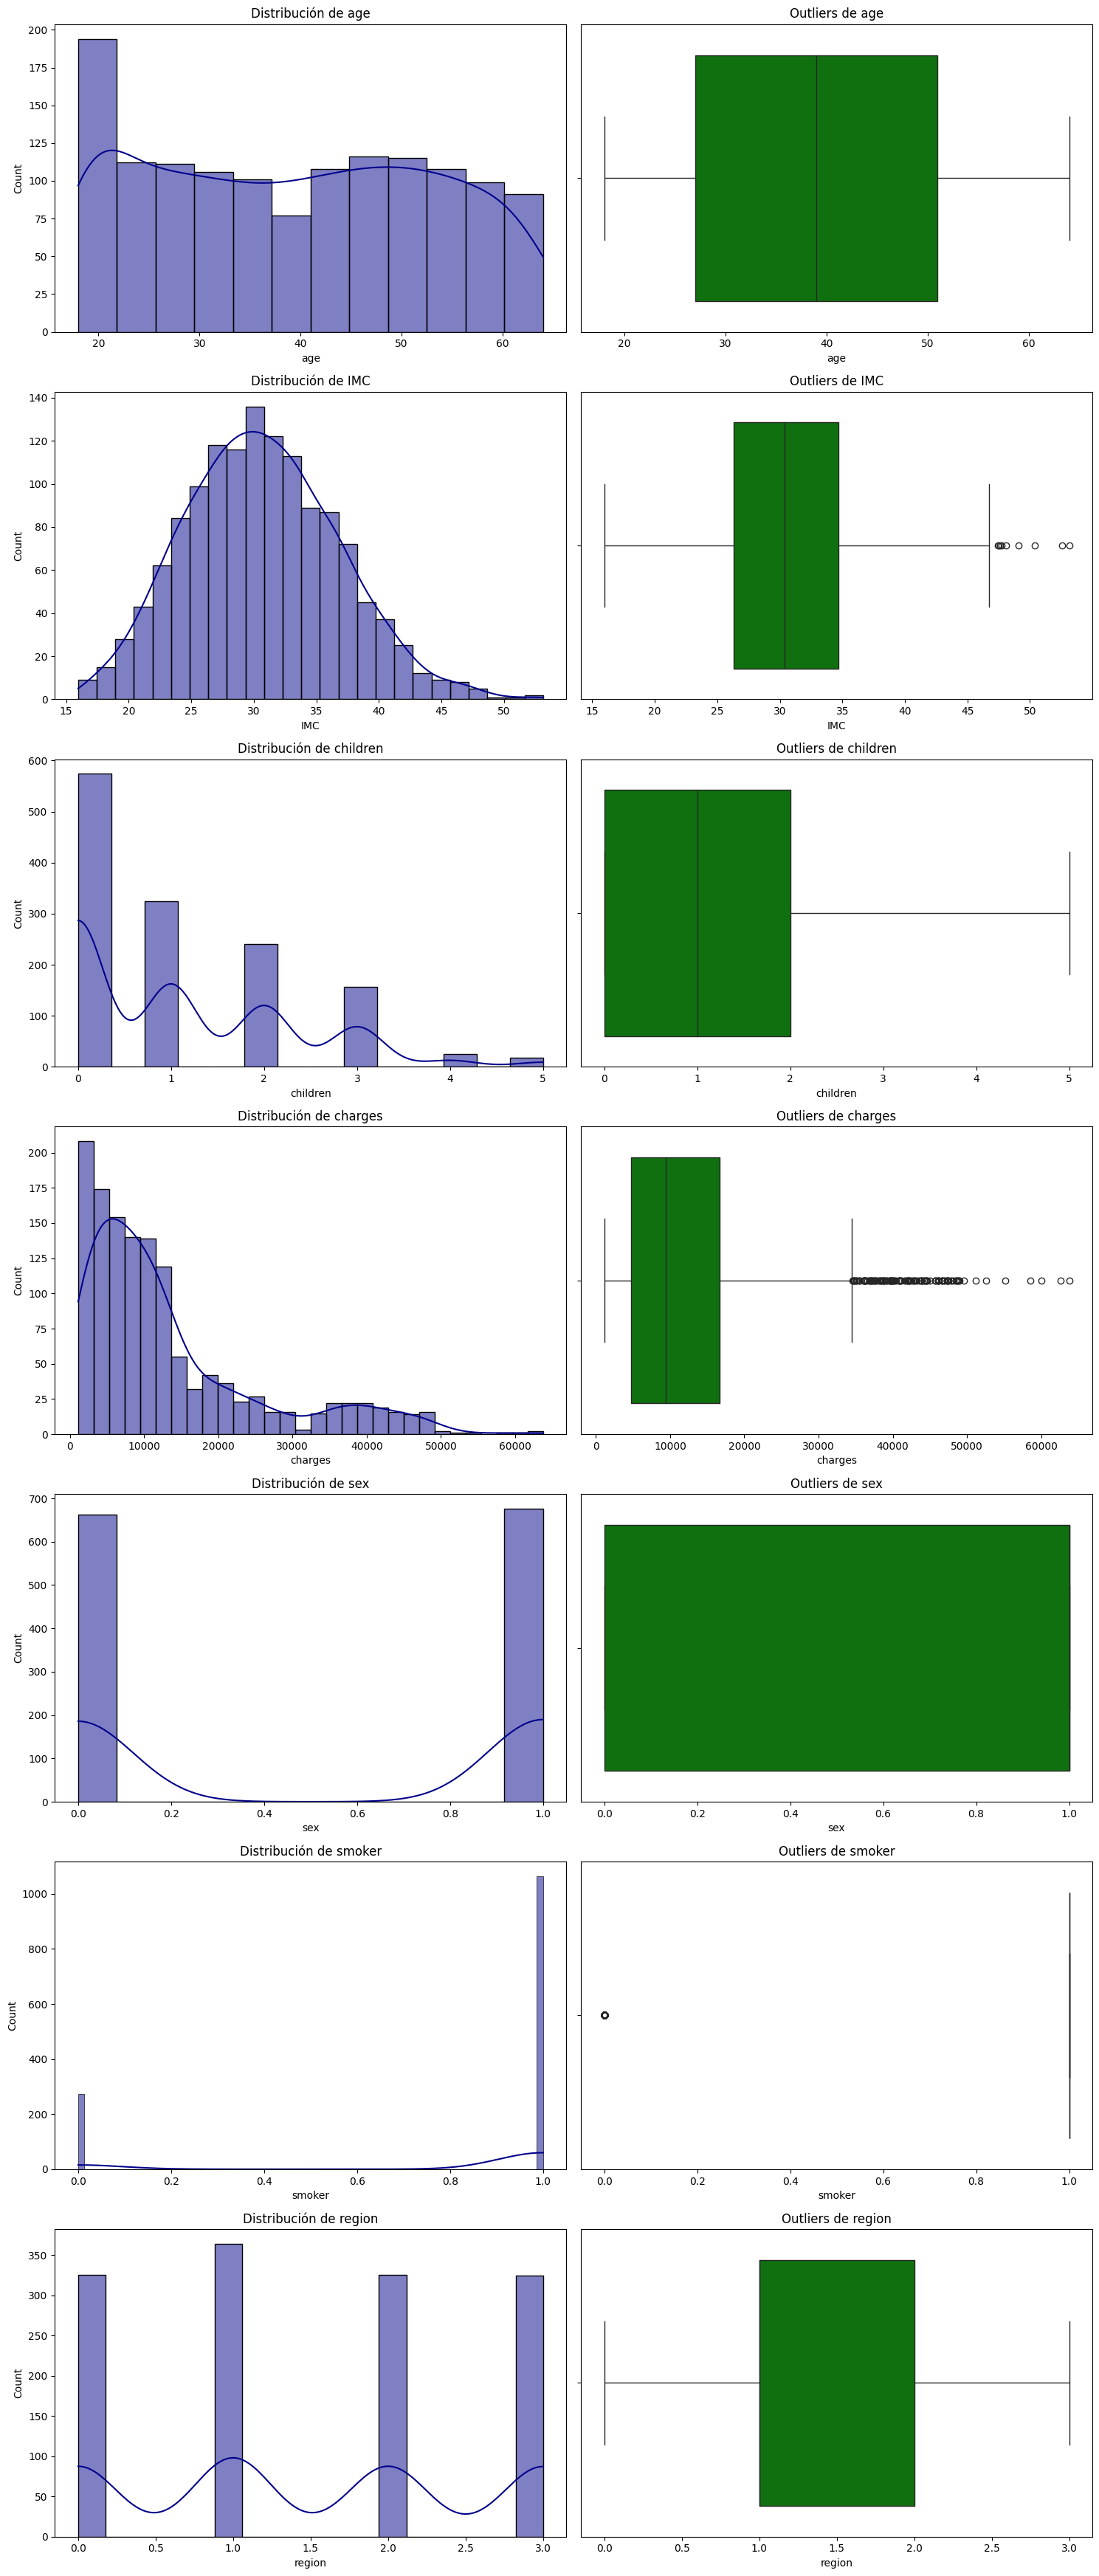

In [16]:
uninum(total_df)

#### 2. Analisis Bivariante Numerico

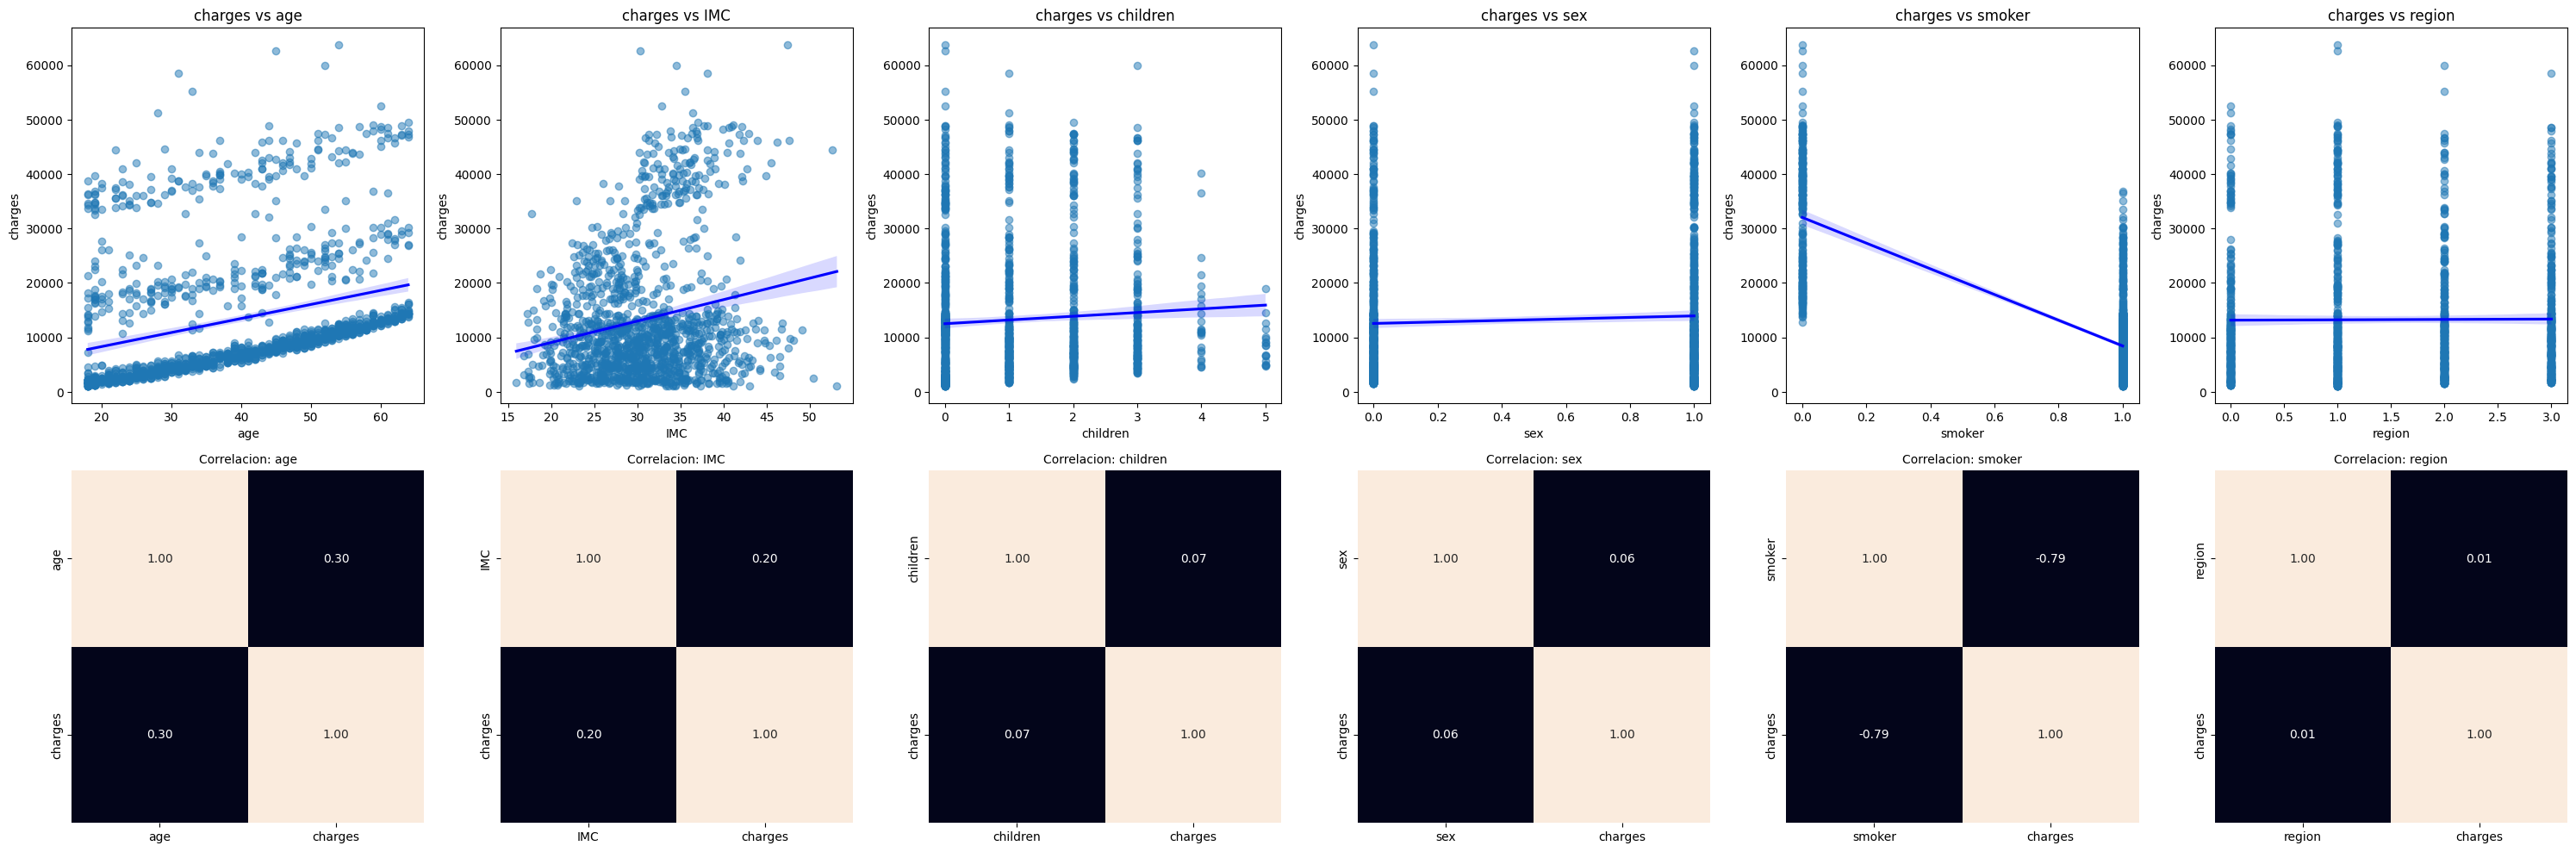

In [79]:
binum(total_df, 'charges')

#### 3. Analisis de Correlacion Multivariable

<Axes: >

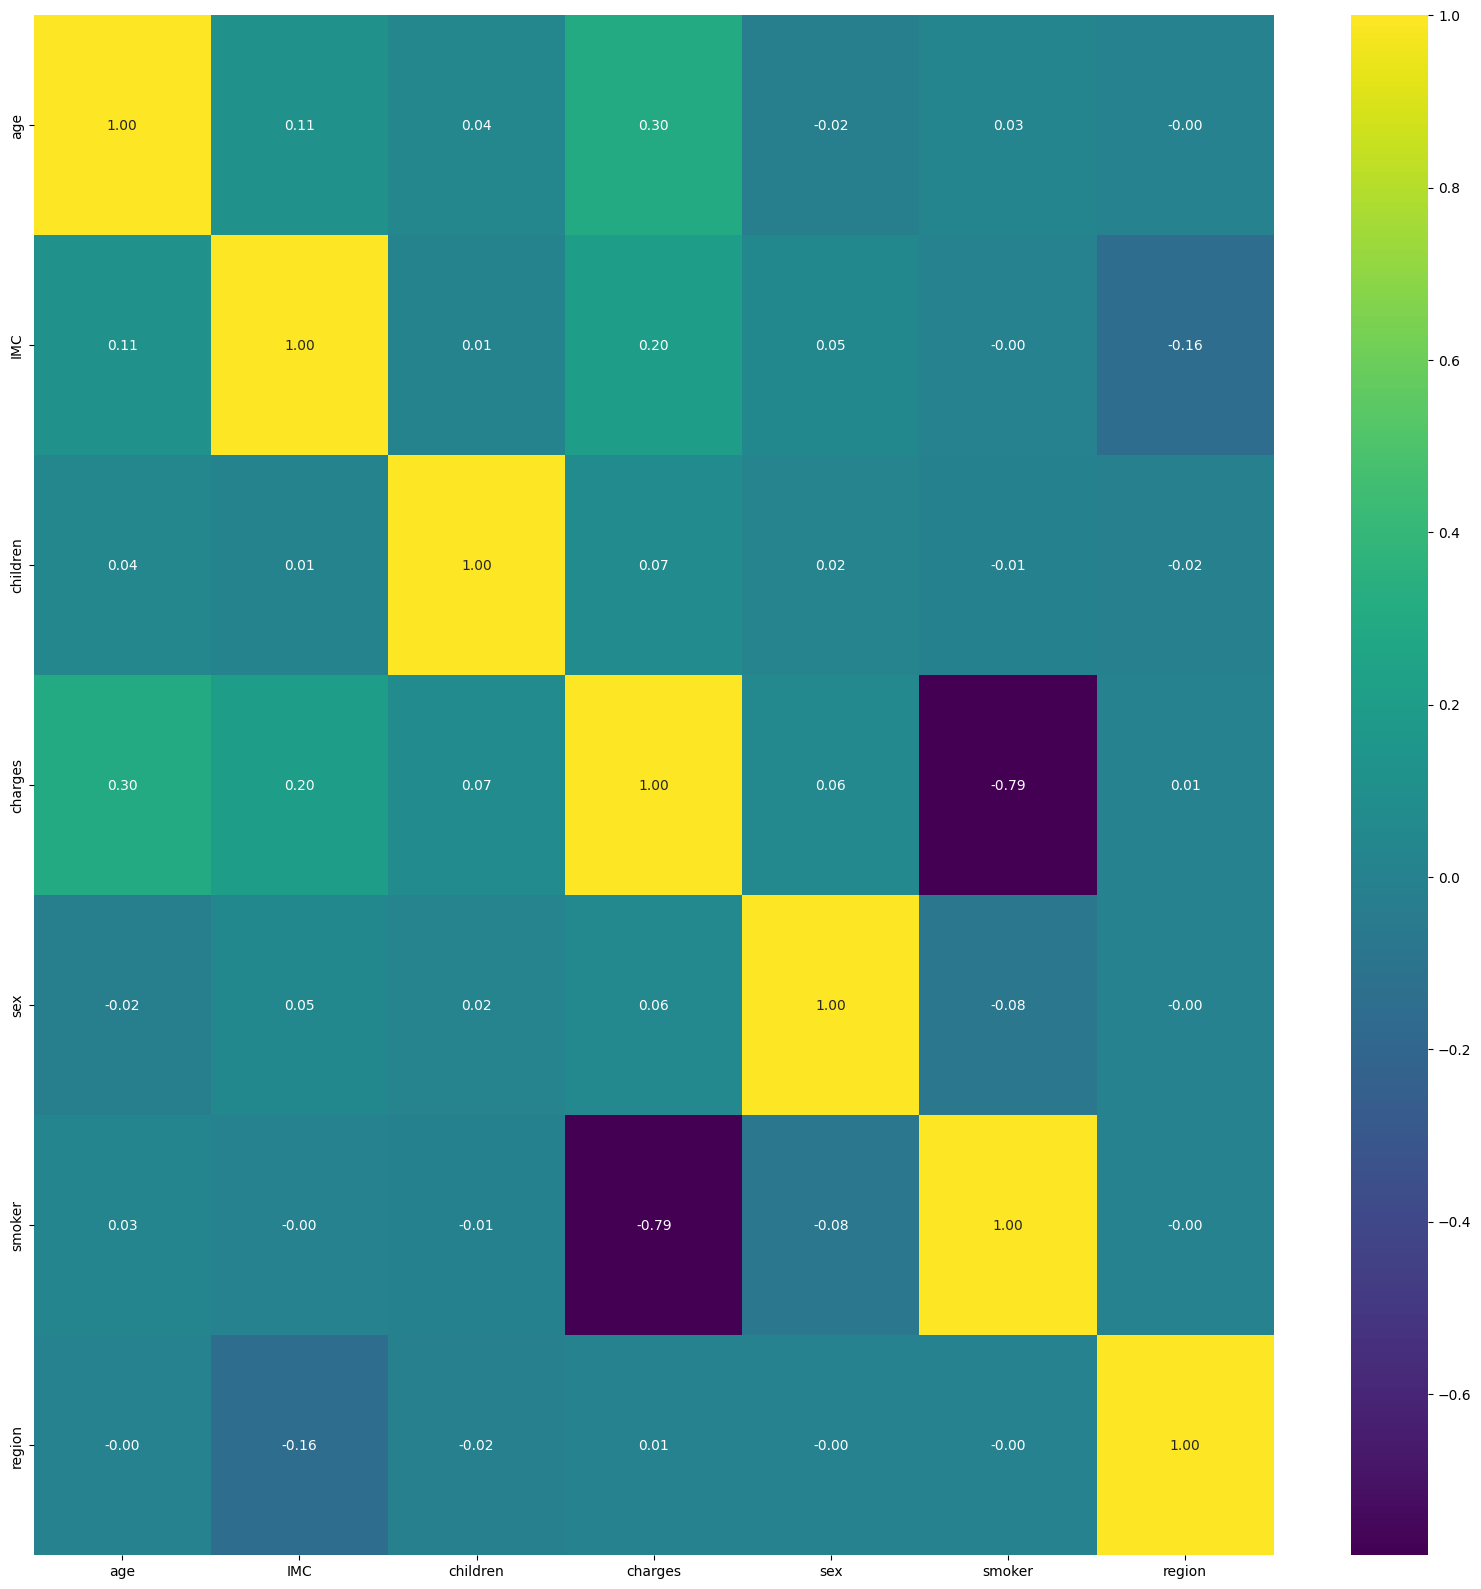

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(total_df.corr(), annot= True, fmt='.2f', cmap='viridis')

A pesar que, de la matriz de correlacion se concluye que las variables predictoras que mayor relacion guardan con la variable objetivo Charges son: Age, IMC, y Smoker, se validara la informacion haciendo la seleccion de caracteristicas con la funcion f_regression.

#### 4. Ingenieria de Caracteristicas (Escalado)

In [82]:
scaler = MinMaxScaler()

scaledV = scaler.fit_transform(total_df)
total_df_scaled = pd.DataFrame(scaledV, index= total_df.index, columns= df2.columns)

total_df_scaled.head()

,age,IMC,children,charges,sex,smoker,region
0,0.021739,0.321227,0.0,0.251611,0.0,0.0,0.000000
1,0.000000,0.479150,0.2,0.009636,1.0,1.0,0.333333
2,0.217391,0.458434,0.6,0.053115,1.0,1.0,0.333333
3,0.326087,0.181464,0.0,0.333010,1.0,1.0,0.666667
4,0.304348,0.347592,0.0,0.043816,1.0,1.0,0.666667


#### 5. Seleccion de Caracteristicas

In [83]:
X = total_df_scaled.drop(columns='charges')
y = total_df_scaled['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

sm = SelectKBest(f_regression, k=3)
sm.fit(X_train, y_train)

sf = sm.get_support(indices=True)

X_train_sel = pd.DataFrame(sm.transform(X_train), columns= X_train.columns[sf])
X_test_sel = pd.DataFrame(sm.transform(X_test), columns= X_test.columns[sf])

X_train_sel.head()

,age,IMC,smoker
0,0.608696,0.107345,1.0
1,0.630435,0.224913,1.0
2,0.739130,0.239440,1.0
3,0.456522,0.493947,1.0
4,0.782609,0.148238,1.0


In [84]:
#Guardamos los datos de entrenamiento en Data Processed

X_train_sel['charges'] = list(y_train)
X_test_sel['charges'] = list(y_test)

X_train_sel.to_excel('/workspaces/P16-Linear-Regression-Model/data/processed/clean_train_sel.xlsx')
X_test_sel.to_excel('/workspaces/P16-Linear-Regression-Model/data/processed/clean_test_sel.xlsx')

X_train_sel.head()

,age,IMC,smoker,charges
0,0.608696,0.107345,1.0,0.128845
1,0.630435,0.224913,1.0,0.118324
2,0.739130,0.239440,1.0,0.414952
3,0.456522,0.493947,1.0,0.119316
4,0.782609,0.148238,1.0,0.181225


#### 6. Entrenamiento del Modelo

In [85]:
train = pd.read_excel('/workspaces/P16-Linear-Regression-Model/data/processed/clean_train_sel.xlsx')
test = pd.read_excel('/workspaces/P16-Linear-Regression-Model/data/processed/clean_test_sel.xlsx')

Xtrain = train.drop(columns=['Unnamed: 0', 'charges'])
ytrain = train['charges']

Xtest = test.drop(columns=['Unnamed: 0', 'charges'])
ytest = test['charges']

Xtrain.head()

,age,IMC,smoker
0,0.608696,0.107345,1
1,0.630435,0.224913,1
2,0.739130,0.239440,1
3,0.456522,0.493947,1
4,0.782609,0.148238,1


In [86]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [87]:
ypred = model.predict(Xtest)
ypred

array([ 0.11272674,  0.10070667,  0.57821866,  0.11983763,  0.41812267,
        0.15954056, -0.00879279,  0.25773417,  0.00124718,  0.14760566,
        0.42448525,  0.12438044,  0.06948097,  0.58427098,  0.63478961,
        0.57064281,  0.220505  ,  0.55860582,  0.13184857,  0.49126352,
        0.02326852,  0.14313563,  0.03229452,  0.09372443,  0.14877621,
        0.18910043,  0.22655494,  0.06542029,  0.1284336 ,  0.02679898,
        0.11351776,  0.19706734,  0.06386832,  0.0233894 ,  0.05919524,
        0.18896102,  0.01973269,  0.12906642,  0.5141742 ,  0.50560642,
        0.02291504,  0.04966696,  0.21363962,  0.17218193,  0.11814249,
        0.182812  ,  0.0574069 ,  0.02535285,  0.5386038 ,  0.12361761,
        0.24523008,  0.02278665,  0.17667288,  0.00587755,  0.2065008 ,
        0.16956738,  0.05210101,  0.48068205,  0.20785186,  0.18792987,
        0.2217814 ,  0.14412406,  0.23590648,  0.09931453,  0.17141346,
        0.0462947 ,  0.39399283,  0.14809505,  0.01605154,  0.09

In [ ]:
#Evaluacion de Rendimiento
print(f'El error cuadratico medio es de', {mean_squared_error(ytest, ypred)})
print(f'El coeficiente de determinacion R2 es', {r2_score(ytest, ypred)})

El error cuadratico medio es de {0.008786302986912442}
El coeficiente de determinacion R2 es {0.7778735788190128}
